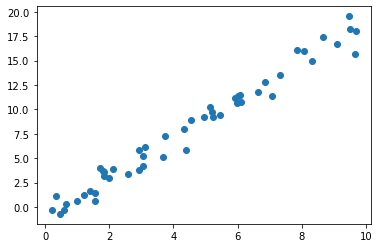

In [1]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42) # seeding # 컴퓨터의 난수는 의사난수임(이미 정해져있음, 시작점을 바꿔줌)
x = 10* rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x,y);

In [13]:
x

array([3.74540119, 9.50714306, 7.31993942, 5.98658484, 1.5601864 ,
       1.5599452 , 0.58083612, 8.66176146, 6.01115012, 7.08072578,
       0.20584494, 9.69909852, 8.32442641, 2.12339111, 1.81824967,
       1.8340451 , 3.04242243, 5.24756432, 4.31945019, 2.9122914 ,
       6.11852895, 1.39493861, 2.92144649, 3.66361843, 4.56069984,
       7.85175961, 1.99673782, 5.14234438, 5.92414569, 0.46450413,
       6.07544852, 1.70524124, 0.65051593, 9.48885537, 9.65632033,
       8.08397348, 3.04613769, 0.97672114, 6.84233027, 4.40152494,
       1.22038235, 4.9517691 , 0.34388521, 9.09320402, 2.58779982,
       6.62522284, 3.11711076, 5.20068021, 5.46710279, 1.84854456])

In [2]:
import sklearn
sklearn.__version__

'0.23.2'

In [ ]:
# 선형회귀는 절편(intercept)과 기울기(slope)를 구함
- regularzation 규제 : 과적합 -> 일반화 (이미 에러가 있다고 최적점으로 가는 것을 막는 것)
- lasso : L1, 차의 절대값
- ridge : L2, 차의 제곱값
- elasticNet : L1 + L2

In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True) # 인스턴스
model

LinearRegression()

In [4]:
X = x[:, np.newaxis] # newaxis : 고차원으로 만들어질때 씀 # 행을 열로 바꿈
X.shape

(50, 1)

In [14]:
X

array([[3.74540119],
       [9.50714306],
       [7.31993942],
       [5.98658484],
       [1.5601864 ],
       [1.5599452 ],
       [0.58083612],
       [8.66176146],
       [6.01115012],
       [7.08072578],
       [0.20584494],
       [9.69909852],
       [8.32442641],
       [2.12339111],
       [1.81824967],
       [1.8340451 ],
       [3.04242243],
       [5.24756432],
       [4.31945019],
       [2.9122914 ],
       [6.11852895],
       [1.39493861],
       [2.92144649],
       [3.66361843],
       [4.56069984],
       [7.85175961],
       [1.99673782],
       [5.14234438],
       [5.92414569],
       [0.46450413],
       [6.07544852],
       [1.70524124],
       [0.65051593],
       [9.48885537],
       [9.65632033],
       [8.08397348],
       [3.04613769],
       [0.97672114],
       [6.84233027],
       [4.40152494],
       [1.22038235],
       [4.9517691 ],
       [0.34388521],
       [9.09320402],
       [2.58779982],
       [6.62522284],
       [3.11711076],
       [5.200

In [5]:
model.fit(X, y) # 학습 - predict

LinearRegression()

In [6]:
model.coef_

array([1.9776566])

In [7]:
model.intercept_

-0.9033107255311164

In [8]:
xfit = np.linspace(-1,11)

In [9]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

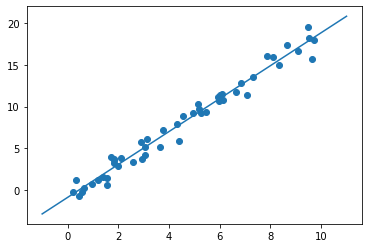

In [10]:
plt.scatter(x,y)
plt.plot(xfit, yfit);

In [16]:
from sklearn.linear_model import Ridge
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42) # 층화 샘플링

ridge = Ridge(alpha=0.01, max_iter=1000).fit(X_train, y_train)
# predict
# score를 사용
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수: 0.78
테스트 세트 점수: 0.74


In [18]:
import numpy as np
from sklearn.metrics import accuracy_score
y_pred = [0,1,2,3]
y_true = [0,1,2,3]
print(accuracy_score(y_true, y_pred))

accuracy_score(y_true, y_pred, normalize=False)

1.0


4

In [ ]:
# 교차분석 (데이터를 10덩어리로 나눠서)
# train / validation / test

In [19]:
# scikit에서 제공하는 데이터 : data, target
from sklearn import svm, datasets
from sklearn.model_selection import cross_val_score
iris = datasets.load_iris()
X, y = iris.data, iris.target
clf = svm.SVC(gamma='scale', random_state=0)
cross_val_score(clf, X, y, scoring='recall_macro',cv=5)

array([0.96666667, 0.96666667, 0.96666667, 0.93333333, 1.        ])

In [20]:
from sklearn.metrics import confusion_matrix # 혼돈행렬
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

In [ ]:
    0, 1, 2
 0  2  0  0
 1  0  0  1
 2  1  0  2

In [33]:
import numpy as np
import sklearn.metrics as metrics
y = np.array([1,1,1,1,0,0])
p = np.array([1,1,0,0,0,0]) # 예측

accuracy = np.mean(np.equal(y,p)) # T : 4  F : 2
right = np.sum(y * p == 1) # 2개 TP를 구하고 있음
precision = right / np.sum(p) # 예측값  정밀도
recall = right / np.sum(y) # 재현율 =     2/참4 = 0.5
f1 = 2 * precision*recall/(precision+recall)

print('accuracy', accuracy)
print('precision', precision)
print('recall', recall)
print('f1', f1)

print('accuracy', metrics.accuracy_score(y,p))
print('precision', metrics.precision_score(y,p))
print('recall', metrics.recall_score(y,p))
print('f1_score', metrics.f1_score(y,p))

print(metrics.classification_report(y,p))
print(metrics.confusion_matrix(y,p))
# macro avg = (normal + abnormal) / 2 * precision
# weighted avg = normal/(normal+abnormal) * precision

accuracy 0.6666666666666666
precision 1.0
recall 0.5
f1 0.6666666666666666
accuracy 0.6666666666666666
precision 1.0
recall 0.5
f1_score 0.6666666666666666
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.50      0.67         4

    accuracy                           0.67         6
   macro avg       0.75      0.75      0.67         6
weighted avg       0.83      0.67      0.67         6

[[2 0]
 [2 2]]


In [ ]:
# 정규화하는 이유 - 사이즈를 줄이려고
- 종속변수에 미치는 독립변수의 영향력을 동일하게 하기 위해서
- 건강 : 키(170) + 몸무게(60) : scale을 1로 해준다

[-3. -2. -1.  0.  1.  2.  3.  4.  5.  6.]


<AxesSubplot:>

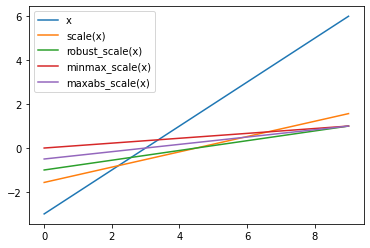

In [31]:
%matplotlib inline
import matplotlib.pylab as plt

import pandas as pd
import numpy as np

# 함수 class 베이스로 제공
#   - Normalizer
#   - MiniMaxScaler
#   - RobustScaler
#   - StandardScaler
# scale : Z점수 : 표본의 평균의 확률을 구하는데 표준정규분포표
#      모든점수 - 평균
#     -----------------
#          표준편차            표준편차 1배수 : 67%
#                                       2배수 : 95%
#                                       3배수 : 99%

from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale
print((np.arange(10, dtype=np.float) -3))
x = (np.arange(10, dtype=np.float) -3).reshape(-1, 1)

# print(x)
# h : horizontal 수평으로  : 변수로 만들어라
# v : vertical 수직으로 : 데이터 포인트로 만들어라

df = pd.DataFrame(np.hstack([x, scale(x), robust_scale(x), minmax_scale(x), maxabs_scale(x)]),
                 columns=["x", "scale(x)", "robust_scale(x)",
                          "minmax_scale(x)", "maxabs_scale(x)"])
df.plot()

<class 'sklearn.utils.Bunch'>
전처리전 평균: [5.84333333 3.05733333 3.758      1.19933333]
전처리전 std: [0.82530129 0.43441097 1.75940407 0.75969263]
전처리후 mean: [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]
전처리후 std: [1. 1. 1. 1.]


C:\Users\9\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


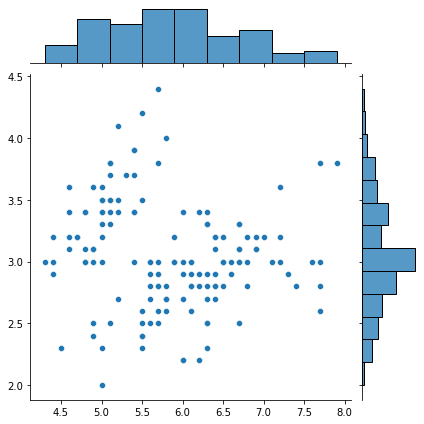

C:\Users\9\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


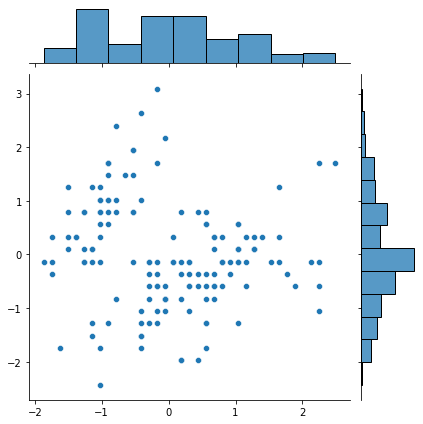

In [37]:
from sklearn.preprocessing import scale
import seaborn as sns
from sklearn.datasets import load_iris
iris = load_iris()
print(type(iris))
data1 = iris.data
data2 = scale(iris.data)

print("전처리전 평균:", np.mean(data1, axis=0))
print("전처리전 std:", np.std(data1, axis=0))
print("전처리후 mean:", np.mean(data2, axis=0))
print("전처리후 std:", np.std(data2, axis=0))

sns.jointplot(data1[:,0], data1[:,1])
plt.show()

sns.jointplot(data2[:,0], data2[:,1])
plt.show()

In [ ]:
# scikits의 특징
- 인터페이스 통일
- model_selection
- features_selection
- features_extraction
- decomposition
    - PCA, MDS, NHF, LEE(변형이 없음)
- 모델
    - 정보기반학습 : 정보이득이 있어야 나눈다(불순도)
    - 확률기반학습 : naive bayes
    - 유사도 기반학습 : 거리와 내적을 이용해서
            - clustering : kmeans, dbscan, hierachical clustering
            - knn
            - recommendation 추천
    - 오차기반학습
            - ANN -> DNN(CNN, RNN, GAN, AE)

In [92]:
from sklearn import preprocessing
x = [[1., -1., 2.],
    [2., 0., 0.],
    [0., 1., -1.]]
X_normallized = preprocessing.normalize(X, norm='l2') # L1 : 절대값, L2 : 결측값

X_normallized

array([[0.89442719, 0.        , 0.4472136 ],
       [0.        , 0.31622777, 0.9486833 ]])

In [39]:
# 평균 / 표준편차
normalizer = preprocessing.Normalizer().fit(X)
normalizer.transform(X)

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451],
       [0.80373519, 0.55070744, 0.22325977, 0.02976797],
       [0.786991  , 0.55745196, 0.26233033, 0.03279129],
       [0.82307218, 0.51442011, 0.24006272, 0.01714734],
       [0.8025126 , 0.55989251, 0.20529392, 0.01866308],
       [0.81120865, 0.55945424, 0.16783627, 0.02797271],
       [0.77381111, 0.59732787, 0.2036345 , 0.05430253],
       [0.79428944, 0.57365349, 0.19121783, 0.05883625],
       [0.80327412, 0.55126656,

In [40]:
normalizer.fit_transform(X)

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451],
       [0.80373519, 0.55070744, 0.22325977, 0.02976797],
       [0.786991  , 0.55745196, 0.26233033, 0.03279129],
       [0.82307218, 0.51442011, 0.24006272, 0.01714734],
       [0.8025126 , 0.55989251, 0.20529392, 0.01866308],
       [0.81120865, 0.55945424, 0.16783627, 0.02797271],
       [0.77381111, 0.59732787, 0.2036345 , 0.05430253],
       [0.79428944, 0.57365349, 0.19121783, 0.05883625],
       [0.80327412, 0.55126656,

In [59]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean') # 전략은 평균
imp_mean.fit([[7, 2, 3], [4, np.nan, 6], [10, 5, 9]])
X = [[np.nan, 2, 3], [4, np.nan, 6], [10, np.nan, 9]]
print(imp_mean.transform(X))

[[ 7.   2.   3. ]
 [ 4.   3.5  6. ]
 [10.   3.5  9. ]]


In [44]:
# 거리값으로 거리를 구한 다음 가장 근접한 2개의 데이터를 이용해서 평균값으로 결측치 처리
from sklearn.impute import KNNImputer # knn k - nearest neighbor
X = [[1, 2, np.nan], [3, 4, 3], [np.nan, 6, 5], [8, 8, 7]]
imputer = KNNImputer(n_neighbors=2)
imputer.fit_transform(X)

array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

In [45]:
import numpy as np
import pandas as pd
dataset= [10,12,12,13,12,11,14,13,15,10,10,10,100,12,14,13, 12,10, 10,11,12,15,12,13,12,11,14,13,15,10,15,12,10,14,13,15,10]
outliers=[] 

In [ ]:
- 표준차기반 이상치 제거(Z점수 기반)
- 평균, 표준편차
- 표준정규분포에서 확률을 확인하고자 할 때

In [47]:
def detect_outlier(data_1):
    threshold=3 # 문지방 : 표준편차의 3배수 - 99%
    mean_1 = np.mean(data_1)
    std_1 = np.std(data_1)
    for y in data_1:
        z_score = (y - mean_1)/std_1
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers
outliers_datapoints = detect_outlier(dataset)
print(outliers_datapoints)

[100]


In [51]:
#from sklearn.impute import load_boston
dataset=sorted(dataset)
print(dataset)
dataset=np.array(dataset)
# -------------/----------------/------------------/----------------
q1, q3 = np.percentile(dataset,[25,75]) # 100분위수를 지정
iqr = q3 - q1   # 3사분위수 - 1사분위수 = inter quantile range
lower_bound = q1 - (1.5 * iqr) # 하한값
upper_bound = q3 - (1.5 * iqr) # 상한값

print(lower_bound)
print(upper_bound)
print(dataset < lower_bound)
print(dataset > upper_bound)
a=dataset < upper_bound
type(a)

[10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 15, 100]
6.5
9.5
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True]


numpy.ndarray

In [53]:
dataset[dataset > upper_bound]

array([ 10,  10,  10,  10,  10,  10,  10,  10,  10,  11,  11,  11,  12,
        12,  12,  12,  12,  12,  12,  12,  12,  13,  13,  13,  13,  13,
        13,  14,  14,  14,  14,  15,  15,  15,  15,  15, 100])

In [55]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder # summy 변수화
ohe = OneHotEncoder()
X = np.array([[0],[1],[2]])
X
ohe.fit(X)
ohe.categories_

[array([0, 1, 2])]

In [56]:
print(ohe.transform(X).toarray())

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [61]:
ohe = OneHotEncoder()
X = np.array([[0 ,0 ,4], [1, 1, 0], [0, 2, 1], [1, 0, 2], [1, 1, 3]])
ohe.fit(X)

OneHotEncoder()

In [62]:
ohe.categories_

[array([0, 1]), array([0, 1, 2]), array([0, 1, 2, 3, 4])]

In [63]:
ohe.transform(X).toarray()

array([[1., 0., 1., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 1., 0.]])

In [65]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit([1, 2, 2, 6])
le.classes_

array([1, 2, 6])

In [66]:
le.transform([1, 1, 2, 6])

array([0, 0, 1, 2], dtype=int64)

In [67]:
le.inverse_transform([0, 0, 1, 2]) # inverse_transform : 원위치 데이터로 바꿔줌

array([1, 1, 2, 6])

In [ ]:
# 문제 : 다음 데이터를 라벨인코딩하시오
["서울"],["서울"],["대전"],["부산"]

In [69]:
# 풀이
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit([["서울"],["서울"],["대전"],["부산"]])
le.classes_

C:\Users\9\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array(['대전', '부산', '서울'], dtype='<U2')

In [ ]:
# 문제 : ["서울"],["서울"],["부산"]데이터에 대하여 라벨링 해보시오
#        다시 데이터로 변환하시오

In [84]:
# 풀이
le.transform([["서울"],["서울"],["부산"]])

array([2, 2, 1], dtype=int64)

In [73]:
le.inverse_transform([2,2,1])

array(['서울', '서울', '부산'], dtype='<U2')

In [77]:
from sklearn.feature_extraction import DictVectorizer
v = DictVectorizer(sparse=False)
D = [{'foo':1, 'bar':2}, {'foo':3, 'baz':1}]
X = v.fit_transform(D)
X

array([[2., 0., 1.],
       [0., 1., 3.]])

In [78]:
v.feature_names_ # 3개의 종류

['bar', 'baz', 'foo']

In [80]:
v.inverse_transform(X)

[{'bar': 2.0, 'foo': 1.0}, {'baz': 1.0, 'foo': 3.0}]

In [ ]:
# 최적화
- 오버피팅 - 과적합

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
x = np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0])
y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])
z = np.polyfit(x, y, 3) # 3차방정식으로
print(z) # 계수

p = np.poly1d(z) # 계수들을 이용해서 방정식을 구성
print(p(1.0))
print(p(3.5))
print(p(4.5))

[ 0.08703704 -0.81349206  1.69312169 -0.03968254]
0.9269841269841258
-0.347321428571432
-0.9625992063492123


C:\Users\9\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


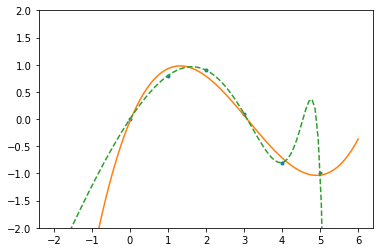

In [94]:
import matplotlib.pyplot as plt
p30 = np.poly1d(np.polyfit(x, y, 30)) # 30차방정식으로
p30(4)
xp = np.linspace(-2, 6, 100)

_=plt.plot(x, y, '.', xp, p(xp), '-', xp, p30(xp), '--')
plt.ylim(-2,2)
plt.show()

In [98]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

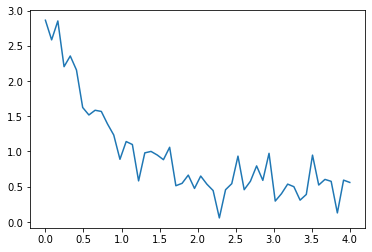

In [99]:
# scipy 최적화 :
from scipy.optimize import curve_fit

xdata = np.linspace(0, 4, 50) # 0에서 4까지 50개로 나눔
y = func(xdata, 2.5, 1.3, 0.5)
np.random.seed(1729)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata)

In [100]:
# 계수와 공분산
popt, pcov = curve_fit(func, xdata, ydata)
popt

array([2.55423706, 1.35190947, 0.47450618])

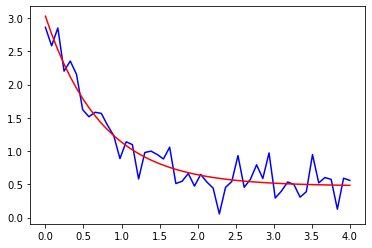

In [103]:
plt.plot(xdata, ydata, '-b', label='data')
plt.plot(xdata, func(xdata, *popt), 'r-')

In [ ]:
brute force.(무차별 대입 공격)

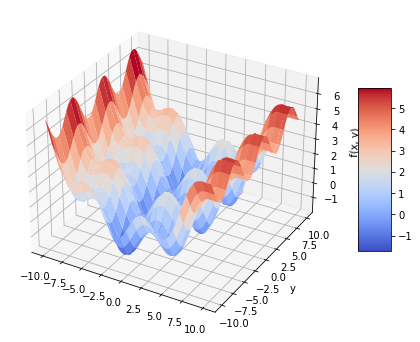

In [110]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

def fm(p):
    x, y = p
    return (np.sin(x) + 0.05 * x **2
           + np.sin(y) + 0.005 * y **2)

x = np.linspace(-10, 10, 50)
y = np.linspace(-10, 10, 50)
X, Y = np.meshgrid(x, y)
Z = fm((X, Y))
fig = plt.figure(figsize=(9, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap=mpl.cm.coolwarm,
                      linewidth=0.5, antialiased=True)

ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)

In [106]:
import scipy.optimize as spo

def fo(p):
    x, y = p
    z = np.sin(x) + 0.05 * x ** 2 + np.sin(y) + 0.05 * y ** 2
    if output == True:
        print('%8.4f %8.4f %8.4f' % (x, y, z))
    return z
output = False
opt1 = spo.brute(fo, ((-10, 10.1, 0.1), (-10, 10.1, 0.1)), finish=None)
print(opt1)

[-1.4 -1.4]


In [108]:
output = False
# 활강단체법 - Nelder-Mead (알고리즘)
spo.fmin(fo,opt1, maxiter=250)

Optimization terminated successfully.
         Current function value: -1.775726
         Iterations: 22
         Function evaluations: 44


array([-1.42755002, -1.42749423])

In [ ]:
# model-selection
- train_test_split
- GridSearchCV
- cross_val_score(cross_validation)

# features-selection
- scikits : model - estimator
- RFE : 재귀적으로 변수를 제거하는 모델
- SVR
- RFE가 SVR을 Wrapper(감싸게) 하고 있다.

In [2]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)
estimator = SVR(kernel="linear")
selector = RFE(estimator, 5, step=1)
selector = selector.fit(X, y)
print(selector.support_)
print(selector.ranking_)
print(selector.n_features_)

[ True  True  True  True  True False False False False False]
[1 1 1 1 1 6 4 3 2 5]
5


In [3]:
type(selector)

sklearn.feature_selection._rfe.RFE

In [4]:
selector.estimator_

SVR(kernel='linear')

In [5]:
# 예측값과 실제 값의 차이를 출력 하시오 테스트 데이터는 x를 그래도 사용하시오
# 출력된 차이의 MSE(mean square error)를 구하시오

In [6]:
selector

RFE(estimator=SVR(kernel='linear'), n_features_to_select=5)

In [32]:
selector.predict(X) - y

array([-1.69902845, -2.79542068,  1.94390124,  1.07558198,  2.6534535 ,
       -2.62179791,  5.51989507, -5.58370939, -2.78286736, -3.0592759 ,
       -0.30609224, -1.19360287, -4.99205339, -3.10605401, -2.17419405,
        0.1056724 , -2.42551818,  3.84075279,  4.20689025, -0.31242916,
        1.24453339,  1.71599165, -3.67325733,  5.36041805,  4.7485667 ,
       -2.19288008, -2.16758485,  2.89354974,  1.8148168 ,  3.65635389,
        0.95460893, -0.08250305,  0.10017767, -2.5617331 ,  4.75055783,
        5.19629532,  2.5790045 , -0.57598316, -4.93496426,  2.53109964,
       -6.37444442,  1.61369407,  8.98444876, -0.10035544, -1.86204848,
       -0.77977276,  1.87672799, -2.67462797,  1.99958628, -0.09982201])

In [35]:
sum((selector.predict(X) - y)**2)/50

10.577977002630696

In [ ]:
- 카이제곱 분석
- 관측값-기대값 ) **2
---------------------------------
            기대값

In [107]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X,y = load_iris(return_X_y=True)
X.shape

X_new = SelectKBest(chi2, k=2).fit_transform(X,y)
X_new.shape

(150, 2)

In [108]:
# tree 분석 -> variables-importance 출력
# 상관분석을 해서 중요변수를 선택
# PCA : 주성분을 이용해서 변수를 선택

from sklearn.datasets import load_boston # data, target
#데이터 프레임에 입력하시오 그리고 head로 그 값을 확인하시오
# 변수간에 상관계수를 구하고 이를 시각화하시오 (heatmap을 이용)
# 상관계수가 0.5보다 큰 변수만 선택하시오
# 선형회귀를 이용해서 분석을 할 때 RFE를 이용해서 변수를 7개로 줄이시오
# - 변수 Ranking을 출력

In [109]:
X, y = load_boston(return_X_y=True)

In [110]:
load_boston().feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [111]:
import pandas as pd
df=pd.DataFrame(X,columns=load_boston().feature_names)

In [112]:
y = pd.Series(y,name="Target")
df=pd.concat([df,y],axis=1)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


<AxesSubplot:title={'center':'load_boston'}>

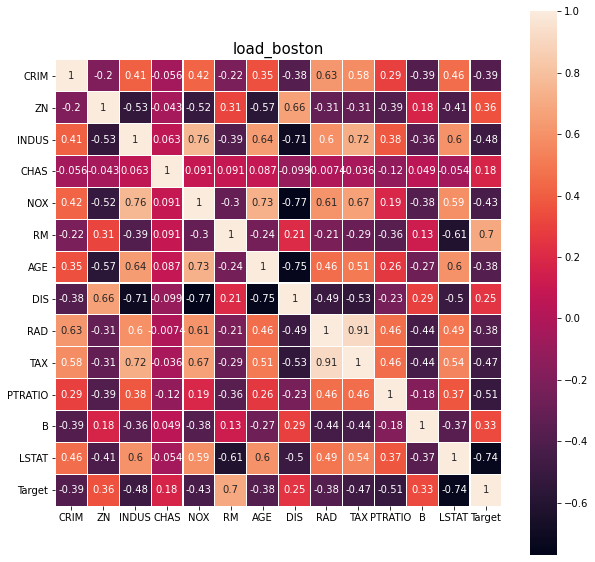

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.title("load_boston", size = 15)
sns.heatmap(df.corr(), linewidths = 0.1, vmax = 1.0, square = True, linecolor = "white", annot = True, annot_kws = {"size" : 10})

In [140]:
a[abs(df.corr().Target)>0.5].keys()

Index(['RM', 'PTRATIO', 'LSTAT', 'Target'], dtype='object')

In [141]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
estimator = SVR(kernel="linear")
selector1 = RFE(estimator, 7, step=1)
selector1 = selector1.fit(X, y)
print(selector1.support_)
print(selector1.ranking_)
print(selector1.n_features_)

C:\Users\020\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=7 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


[ True False False  True  True  True False  True False False  True False
  True]
[1 3 2 1 1 1 4 1 6 7 1 5 1]
7


In [175]:
TT=selector1.support_
col=df.columns
result=pd.DataFrame(TT,col[:13])
r=result[0]
r[result[0]==True].keys()

Index(['CRIM', 'CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT'], dtype='object')